## Load data

In [2]:
import sys
 
sys.path.insert(0, "../")

In [3]:
from dataAnalysis.data.Filter import Filter
import pandas as pd
from dataAnalysis.Constants import *
from dataAnalysis.DataAnalysis import DataAnalysis

data = pd.read_csv(r"../extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data, mimic_data = None)

/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [4]:
y_train = data_analysis.get_y_train()
X_train = data_analysis.get_X_train()

y_test = data_analysis.get_y_test()
X_test = data_analysis.get_X_test()

y_gw_test = data_analysis.get_y_gw()
X_gw_test = data_analysis.get_X_gw()

## Metrics definition

In [5]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test, y_gw_test, X_test, X_gw_test)

In [6]:
from sklearn.metrics import precision_recall_curve
def print_prc(classifier, y_test = y_test):
    y_score = classifier.predict_proba(X_test)[:, 1]
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()

## Logistic regression

7.921180486679077
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.044219  0.776133  0.441226   0.008632  0.836916  0.009453
1  Greifswald  0.022229  0.592021  0.373617   0.003746  0.755808  0.004283


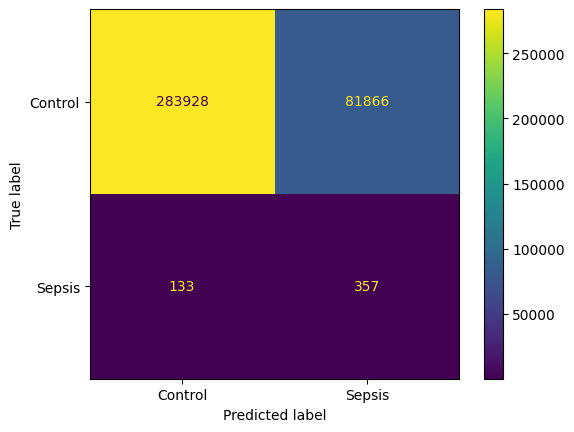

In [7]:
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
logistic_regression = LogisticRegression(random_state=0, solver="liblinear", class_weight="balanced")
logistic_regression.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(logistic_regression))
evaluation.plot_confusion_matrix(logistic_regression)

## Decision Tree

3.620481252670288
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.044252  0.726204  0.424541   0.007894  0.849454  0.009056
1  Greifswald  0.027364  0.631928  0.389278   0.004322  0.787637  0.003666


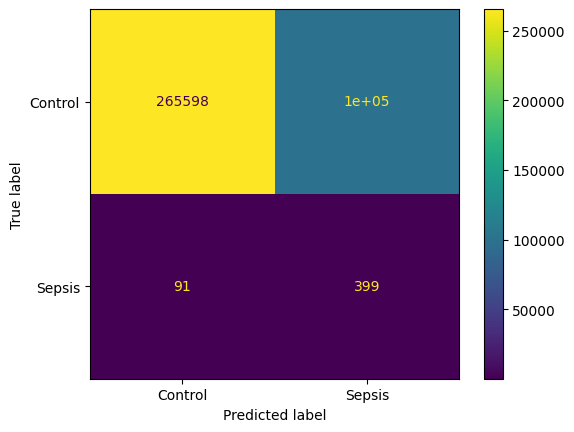

In [8]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
decision_tree = DecisionTreeClassifier(random_state=42, max_features=6, min_samples_leaf=0.005,
                       min_samples_split=0.03, class_weight="balanced")
decision_tree.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(decision_tree))
evaluation.plot_confusion_matrix(decision_tree)

## Random Forest

29.78094220161438
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.060518  0.885938  0.477137   0.014809  0.870289  0.015629
1  Greifswald  0.038252  0.841290  0.460685   0.007622  0.817987  0.005904
[0.12459465 0.01369823 0.05946382 0.53304181 0.0731201  0.05233793
 0.14374346]


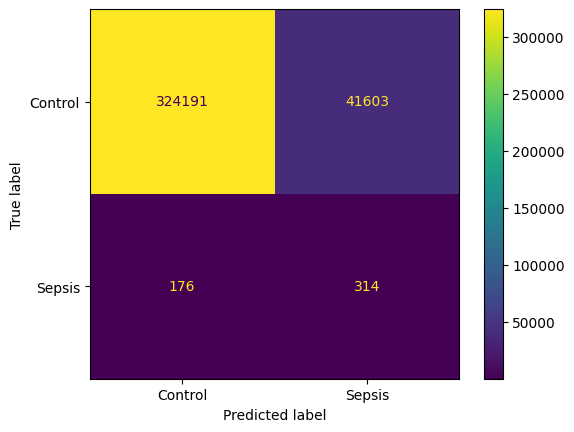

In [9]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(random_forest))
evaluation.plot_confusion_matrix(random_forest)
print(random_forest.feature_importances_)

## XG Boost

3.0342214107513428
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.078705  0.980769  0.515829   0.041372  0.875481  0.018280
1  Greifswald  0.039413  0.959589  0.496704   0.014035  0.808292  0.006737


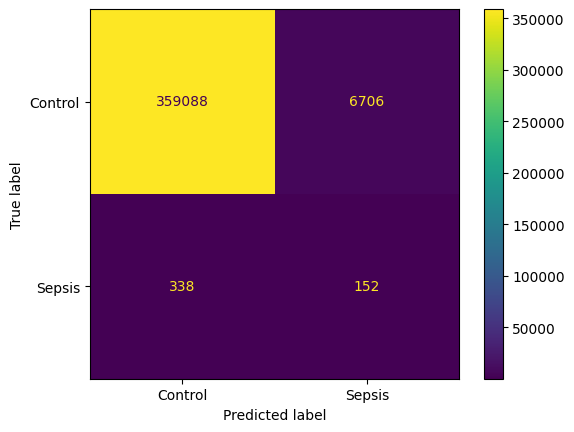

In [36]:
from xgboost import XGBClassifier

start = time.time()
xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 70,
                           n_estimators=1000,
                           max_depth=2,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")
xgb_classifier.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(xgb_classifier))
evaluation.plot_confusion_matrix(xgb_classifier)

## RUS Boost

/home/dwalke/.local/lib/python3.10/site-packages/imblearn/ensemble/_weight_boosting.py:267: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


229.92461347579956
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.056904  0.864288  0.470080   0.013025  0.867951  0.016951
1  Greifswald  0.035836  0.806673  0.449801   0.006685  0.815194  0.006096


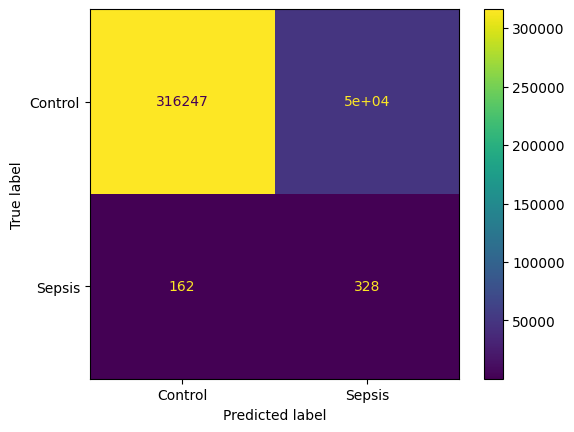

In [37]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
rus_boost = RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=79, min_samples_leaf= 5, min_samples_split = 10),
                   learning_rate=0.90369, n_estimators=495,
                   random_state=1714400672, sampling_strategy=35/65)
rus_boost.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(rus_boost))
evaluation.plot_confusion_matrix(rus_boost)

# Differently strict machine learning classifiers

## Range where the classifier is not sure 

In [15]:
import numpy as np
from numpy import argmax
from numpy import sqrt
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1], pos_label=1)
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)

BEST_THRESHOLD = 0.5 # thresholds[ix]
CRITICAL_RANGE = .05
rf_proba = random_forest.predict_proba(X_test)[:, 1]
above_critical = rf_proba >= BEST_THRESHOLD-(CRITICAL_RANGE/2)
below_critical = rf_proba <= BEST_THRESHOLD+(CRITICAL_RANGE/2)
critical_proba = np.logical_and(above_critical, below_critical)
critical_proba.sum()

9508

## Describe proba of samples in the critical range

In [17]:
indices = np.where(critical_proba)
pd.DataFrame(rf_proba[indices[0]]).describe()

,0
count,9508.000000
mean,0.500177
std,0.014507
min,0.475000
25%,0.487534
50%,0.500123
75%,0.512948
max,0.524999


[Voting] ....................... (2 of 2) Processing lr, total=  16.8s


## Critical samples to logistic regression

In [18]:
lr_proba = logistic_regression.predict_proba(X_test[indices[0]])[:, 1]
rf_proba[indices] = lr_proba

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
auroc = roc_auc_score(y_test, rf_proba)
auprc = average_precision_score(y_test, rf_proba)
auroc, auprc

(0.867708394587653, 0.012599318532430143)

[Voting] ....................... (1 of 2) Processing rf, total=  29.4s
[Voting] ....................... (2 of 2) Processing lr, total=  17.6s
[Voting] ....................... (1 of 2) Processing rf, total=  28.9s


## All samples within a dynamic critical range passed to logistic regression

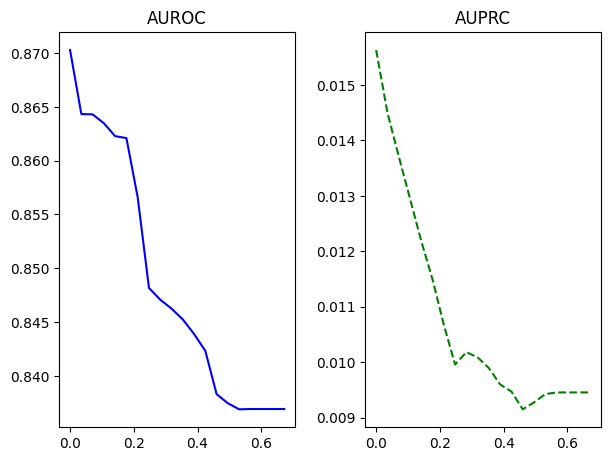

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score


aurocs = []
auprcs = []

clf1 = random_forest
clf2 = logistic_regression

SEPERATOR = 0.3277982620869698 #.5
thresholds = np.linspace(0,1-SEPERATOR, 20, endpoint=True)

for i in thresholds:
    
    THRESHOLD = i
    rf_proba = clf1.predict_proba(X_test)[:, 1]
    highest_scores = rf_proba >= SEPERATOR - THRESHOLD
    lowest_scores = rf_proba <= SEPERATOR + THRESHOLD
    indices = np.where(np.logical_and(highest_scores, lowest_scores))[0]
    if indices.shape[0] > 0:
        lr_proba = clf2.predict_proba(X_test[indices])[:, 1]
        rf_proba[indices] = lr_proba
    
    auroc = roc_auc_score(y_test, rf_proba)
    auprc = average_precision_score(y_test, rf_proba)
    aurocs.append(auroc)
    auprcs.append(auprc)

fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)
plt.subplot(1, 2, 1)
plt.plot(thresholds, aurocs, "b-")
plt.title("AUROC")
plt.subplot(1, 2, 2)
plt.plot(thresholds, auprcs, "g--")
plt.title("AUPRC")
plt.show()

In [13]:
np.asarray(aurocs).argmax()

12

In [14]:
aurocs[12], thresholds[12]

(0.8708505500977298, 0.3157894736842105)

## All samples with porbability higher than a specific threshold passed to logistic regression

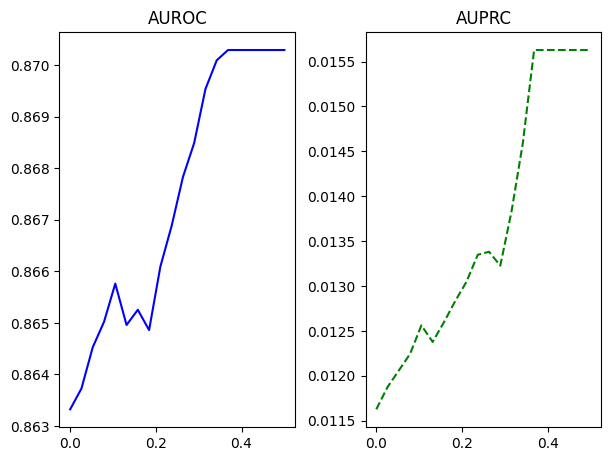

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score


clf1 = random_forest
clf2 = logistic_regression

SEPERATOR = 0.5 #0.3277982620869698
thresholds = np.linspace(0,1-SEPERATOR, 20, endpoint=True)
aurocs = []
auprcs = []
for i in thresholds:
    
    THRESHOLD = i
    rf_proba = clf1.predict_proba(X_test)[:, 1]
    highest_scores = rf_proba[rf_proba >= 0.5 + THRESHOLD]
    indices = np.where(highest_scores)[0]
    
    if indices.shape[0] > 0:
        lr_proba = clf2.predict_proba(X_test[indices])[:, 1]
        rf_proba[indices] = lr_proba
    
    auroc = roc_auc_score(y_test, rf_proba)
    auprc = average_precision_score(y_test, rf_proba)
    aurocs.append(auroc)
    auprcs.append(auprc)

fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)
plt.subplot(1, 2, 1)
plt.plot(thresholds, aurocs, "b-")
plt.title("AUROC")
plt.subplot(1, 2, 2)
plt.plot(thresholds, auprcs, "g--")
plt.title("AUPRC")
plt.show()

# Analysis how logistic regression could correct mistakes of the random forest

##  False positive samples of random forest to logistic regression

## Get false positive from random forest

In [7]:
import numpy as np
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]
y_pred = np.round(y_pred_proba)
false_pos_mask = np.logical_and((y_pred == 1), (y_test == 0))

X_test_false_pos = X_test[false_pos_mask]
y_test_false_pos = y_test[false_pos_mask]

In [8]:
X_test.shape

(366284, 7)

In [9]:
false_pos_corr_mask = logistic_regression.predict(X_test_false_pos) == 0
X_false_pos_corr = X_test_false_pos[false_pos_corr_mask]
## distribution of false positive proba according to random forest
pd.DataFrame(random_forest.predict_proba(X_false_pos_corr)[:, 1]).describe()

10811
(42016, 7)
0.2573067402894136


,0
count,10811.000000
mean,0.587108
std,0.070960
min,0.500004
25%,0.532470
50%,0.567105
75%,0.624540
max,0.850512


In [11]:
##  get indexes from sorted
sepsis_pred_mask = np.logical_and((y_pred_proba >= 0.5), (y_test == 0))
sorted_pred_proba = y_pred_proba[sepsis_pred_mask].sort()
print(y_pred_proba[sepsis_pred_mask][np.argsort(y_pred_proba[sepsis_pred_mask])])

[0.50000226 0.50000399 0.50001381 ... 0.86200229 0.86270719 0.86270719]


In [12]:
## indices of 50 lowest false postive proba according to random forest
np.argsort(y_pred_proba[sepsis_pred_mask])[:50]

array([17033, 33019, 13381, 36308, 24212, 21618, 30324,  2925, 14414,
       37776,  8457, 15645,    41, 34450, 27720, 32169,  4957, 19863,
       24132, 10607, 20989, 32320, 24076, 38713, 12318,  6359,  1648,
        4312,  4441,  3979, 38216,  5064, 30576, 31304,  5881, 20508,
       31957, 21701, 28502, 35194,  7150, 38117, 34825, 15807, 28490,
       23839, 37571,  2114, 24138,   243])

## Unsecure (close to 0.5) false positive prediction passed to logistic regression

In [15]:
## 50 lowest false postive proba according to random forest
pd.DataFrame(random_forest.predict_proba(X_test[sepsis_pred_mask][np.argsort(y_pred_proba[sepsis_pred_mask])[:50]])[:,1]).describe()

,0
count,50.000000
mean,0.500142
std,0.000083
min,0.500002
25%,0.500071
50%,0.500147
75%,0.500214
max,0.500282


In [33]:
# ## Features dataframe from the 50 lowest false postive proba according to random forest
# from dataAnalysis.Constants import FEATURES
# data_analysis.get_testing_data()[sepsis_pred_mask].iloc[np.argsort(y_pred_proba[sepsis_pred_mask])].iloc[:50].to_csv("50_lowest_false_pos_proba_rf.csv", index=False)

In [14]:
first_n = []
corrected_pred = []
ratio_corrected_pred = []
for i in [10, 50, 100, 500, 1000, 10_000, 42_258]:
    first_n.append(i)
    corrected_pred.append((logistic_regression.predict(X_test[sepsis_pred_mask][np.argsort(y_pred_proba[sepsis_pred_mask])[:i]]) == 0).sum())
    ratio_corrected_pred.append(((logistic_regression.predict(X_test[sepsis_pred_mask][np.argsort(y_pred_proba[sepsis_pred_mask])[:i]]) == 0).sum() /
          (X_test[sepsis_pred_mask][np.argsort(y_pred_proba[sepsis_pred_mask])[:i]].shape[0]))*100)
df = pd.DataFrame([])
df = df.assign(firstN=first_n)
df = df.assign(correctedPred=corrected_pred)
df = df.assign(ratioCorrectedPredictions=ratio_corrected_pred)
df.set_index("firstN")

,correctedPred,ratioCorrectedPredictions
firstN,,
10,4,40.000000
50,21,42.000000
100,39,39.000000
500,207,41.400000
1000,419,41.900000
10000,4481,44.810000
42258,10811,25.730674


## Soft voting classifier

In [12]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[("rf", random_forest), ("lr",logistic_regression)], voting="soft", n_jobs=10, verbose=True, weights=[1,1])
vc = vc.fit(X_train, y_train)

In [13]:
print(evaluation.get_df_metrics(vc))

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.057411  0.865309  0.470442   0.013162  0.869243  0.012112
1  Greifswald  0.034538  0.765829  0.436644   0.006007  0.799318  0.005414


In [28]:
print(evaluation.get_df_metrics(random_forest))

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.060518  0.885938  0.477137   0.014809  0.870289  0.015629
1  Greifswald  0.038252  0.841290  0.460685   0.007622  0.817987  0.005904


## Sensitive classifier corrections

In [85]:
from sklearn.metrics import matthews_corrcoef

for i in range(11):
    i = i/10
    
    clf_sens = logistic_regression
    clf_corr = random_forest
    
    y_pred_proba = np.zeros(y_test.shape)

    sorted_pos = np.sort(clf_sens.predict_proba(X_test)[:,1][y_test == 1])
    sens_80 = sorted_pos[-round(sorted_pos.shape[0] *i):]
    sens_80_threshold = sens_80[0]
    log_sens_80 = clf_sens.predict_proba(X_test)[:,1] >= sens_80_threshold

    print(f"Number of samples which should be corrected {log_sens_80.sum()}")
    y_pred_proba[np.logical_not(log_sens_80)] = clf_sens.predict_proba(X_test)[:,1][np.logical_not(log_sens_80)]

    X_test_los_sens_80 = X_test[log_sens_80]
    y_pred_proba[log_sens_80] = clf_corr.predict_proba(X_test_los_sens_80)[:, 1]


    print(f"{i} - {round(matthews_corrcoef(y_test, y_pred_proba >= sens_80_threshold), 4)}")
    print(f"{i} - {round(roc_auc_score(y_test, y_pred_proba), 4)}")

Number of samples which should be corrected 365164
0.0 - 0.0053
0.0 - 0.8705
Number of samples which should be corrected 3298
0.1 - 0.0
0.1 - 0.8366
Number of samples which should be corrected 5305
0.2 - 0.0
0.2 - 0.8354
Number of samples which should be corrected 9494
0.3 - 0.0387
0.3 - 0.8359
Number of samples which should be corrected 15332
0.4 - 0.0668
0.4 - 0.8342
Number of samples which should be corrected 27744
0.5 - 0.0706
0.5 - 0.8339
Number of samples which should be corrected 46569
0.6 - 0.0702
0.6 - 0.8347
Number of samples which should be corrected 70876
0.7 - 0.066
0.7 - 0.8291
Number of samples which should be corrected 106198
0.8 - 0.0591
0.8 - 0.8285
Number of samples which should be corrected 171686
0.9 - 0.0506
0.9 - 0.8429
Number of samples which should be corrected 365164
1.0 - 0.0053
1.0 - 0.8705


In [78]:
X_test.shape

(366284, 7)